### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

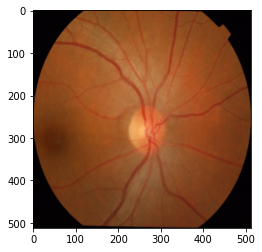

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
l_channel_train = convert_to_lab(0, img_train)
len(l_channel_train)

50

### Test images

In [5]:
l_channel_test = convert_to_lab(0, img_test)
len(l_channel_test)

51

#### Generator of augmented data:

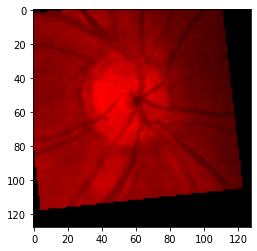

In [6]:
gen = data_generator(l_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


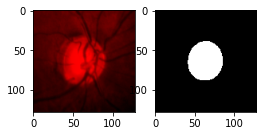

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(l_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size)
history_cup = train(l_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_l', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 70s 672ms/step - loss: 1.5576 - mean_IOU_gpu: 0.1295 - dice_metric: 0.2207 - val_loss: 1.4614 - val_mean_IOU_gpu: 0.1016 - val_dice_metric: 0.1745
Epoch 2/500
99/99 [==============================] - 72s 724ms/step - loss: 1.5024 - mean_IOU_gpu: 0.2147 - dice_metric: 0.3453 - val_loss: 1.4184 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 69s 702ms/step - loss: 1.4914 - mean_IOU_gpu: 0.1297 - dice_metric: 0.2265 - val_loss: 1.3612 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 71s 716ms/step - loss: 1.4286 - mean_IOU_gpu: 0.1198 - dice_metric: 0.2102 - val_loss: 1.2742 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 73s 738ms/step - loss: 1.3001 - mean_IOU_gpu: 0.2762 - dice_metric: 0.4238 - val_loss: 1.1507 - val_mean_IOU_gpu: 0.1907 - 

Epoch 42/500
99/99 [==============================] - 65s 654ms/step - loss: 0.2058 - mean_IOU_gpu: 0.6794 - dice_metric: 0.7962 - val_loss: 0.3394 - val_mean_IOU_gpu: 0.5069 - val_dice_metric: 0.6505
Epoch 43/500
99/99 [==============================] - 63s 641ms/step - loss: 0.2318 - mean_IOU_gpu: 0.6586 - dice_metric: 0.7772 - val_loss: 0.2313 - val_mean_IOU_gpu: 0.6249 - val_dice_metric: 0.7490
Epoch 44/500
99/99 [==============================] - 62s 631ms/step - loss: 0.2459 - mean_IOU_gpu: 0.6340 - dice_metric: 0.7623 - val_loss: 0.2534 - val_mean_IOU_gpu: 0.5971 - val_dice_metric: 0.7285
Epoch 45/500
99/99 [==============================] - 64s 645ms/step - loss: 0.2601 - mean_IOU_gpu: 0.6408 - dice_metric: 0.7596 - val_loss: 0.1880 - val_mean_IOU_gpu: 0.6792 - val_dice_metric: 0.7875
Epoch 46/500
99/99 [==============================] - 64s 641ms/step - loss: 0.2240 - mean_IOU_gpu: 0.6503 - dice_metric: 0.7771 - val_loss: 0.2400 - val_mean_IOU_gpu: 0.6117 - val_dice_metric: 0.

Epoch 83/500
99/99 [==============================] - 63s 632ms/step - loss: 0.1669 - mean_IOU_gpu: 0.7043 - dice_metric: 0.8178 - val_loss: 0.9652 - val_mean_IOU_gpu: 0.2031 - val_dice_metric: 0.2967
Epoch 84/500
99/99 [==============================] - 61s 621ms/step - loss: 0.1892 - mean_IOU_gpu: 0.6926 - dice_metric: 0.8069 - val_loss: 0.1960 - val_mean_IOU_gpu: 0.6577 - val_dice_metric: 0.7820
Epoch 85/500
99/99 [==============================] - 64s 646ms/step - loss: 0.1996 - mean_IOU_gpu: 0.6840 - dice_metric: 0.7984 - val_loss: 0.4662 - val_mean_IOU_gpu: 0.4170 - val_dice_metric: 0.5651
Epoch 86/500
99/99 [==============================] - 63s 635ms/step - loss: 0.1640 - mean_IOU_gpu: 0.7231 - dice_metric: 0.8292 - val_loss: 0.8911 - val_mean_IOU_gpu: 0.2129 - val_dice_metric: 0.3154
Epoch 87/500
99/99 [==============================] - 64s 644ms/step - loss: 0.1557 - mean_IOU_gpu: 0.7157 - dice_metric: 0.8270 - val_loss: 0.5840 - val_mean_IOU_gpu: 0.3562 - val_dice_metric: 0.

Epoch 124/500
99/99 [==============================] - 63s 640ms/step - loss: 0.1651 - mean_IOU_gpu: 0.7063 - dice_metric: 0.8190 - val_loss: 0.2088 - val_mean_IOU_gpu: 0.6493 - val_dice_metric: 0.7776
Epoch 125/500
99/99 [==============================] - 62s 625ms/step - loss: 0.1530 - mean_IOU_gpu: 0.7162 - dice_metric: 0.8275 - val_loss: 0.2292 - val_mean_IOU_gpu: 0.6309 - val_dice_metric: 0.7658
Epoch 126/500
99/99 [==============================] - 63s 635ms/step - loss: 0.1571 - mean_IOU_gpu: 0.7188 - dice_metric: 0.8277 - val_loss: 0.6775 - val_mean_IOU_gpu: 0.3001 - val_dice_metric: 0.4292
Epoch 127/500
99/99 [==============================] - 62s 626ms/step - loss: 0.1663 - mean_IOU_gpu: 0.6977 - dice_metric: 0.8149 - val_loss: 0.6754 - val_mean_IOU_gpu: 0.3077 - val_dice_metric: 0.4336
Epoch 128/500
99/99 [==============================] - 63s 643ms/step - loss: 0.1600 - mean_IOU_gpu: 0.7125 - dice_metric: 0.8236 - val_loss: 0.1527 - val_mean_IOU_gpu: 0.7128 - val_dice_metri

99/99 [==============================] - 60s 609ms/step - loss: 0.1415 - mean_IOU_gpu: 0.7309 - dice_metric: 0.8381 - val_loss: 0.4224 - val_mean_IOU_gpu: 0.4506 - val_dice_metric: 0.6024
Epoch 165/500
99/99 [==============================] - 62s 632ms/step - loss: 0.1550 - mean_IOU_gpu: 0.7147 - dice_metric: 0.8262 - val_loss: 0.1934 - val_mean_IOU_gpu: 0.6591 - val_dice_metric: 0.7865
Epoch 166/500
99/99 [==============================] - 62s 627ms/step - loss: 0.1629 - mean_IOU_gpu: 0.7070 - dice_metric: 0.8196 - val_loss: 1.3076 - val_mean_IOU_gpu: 0.1003 - val_dice_metric: 0.1619
Epoch 167/500
99/99 [==============================] - 62s 622ms/step - loss: 0.1462 - mean_IOU_gpu: 0.7341 - dice_metric: 0.8381 - val_loss: 0.3721 - val_mean_IOU_gpu: 0.4869 - val_dice_metric: 0.6414
Epoch 168/500
99/99 [==============================] - 62s 627ms/step - loss: 0.1395 - mean_IOU_gpu: 0.7337 - dice_metric: 0.8403 - val_loss: 0.2926 - val_mean_IOU_gpu: 0.5533 - val_dice_metric: 0.7020
Epoc

Epoch 205/500
99/99 [==============================] - 43s 434ms/step - loss: 0.1497 - mean_IOU_gpu: 0.7233 - dice_metric: 0.8321 - val_loss: 0.6981 - val_mean_IOU_gpu: 0.2874 - val_dice_metric: 0.4138
Epoch 206/500
99/99 [==============================] - 43s 431ms/step - loss: 0.1410 - mean_IOU_gpu: 0.7336 - dice_metric: 0.8399 - val_loss: 0.3595 - val_mean_IOU_gpu: 0.4989 - val_dice_metric: 0.6499
Epoch 207/500
99/99 [==============================] - 42s 424ms/step - loss: 0.1147 - mean_IOU_gpu: 0.7682 - dice_metric: 0.8644 - val_loss: 0.5694 - val_mean_IOU_gpu: 0.3633 - val_dice_metric: 0.5040
Epoch 208/500
99/99 [==============================] - 42s 424ms/step - loss: 0.1577 - mean_IOU_gpu: 0.7192 - dice_metric: 0.8269 - val_loss: 0.3716 - val_mean_IOU_gpu: 0.4889 - val_dice_metric: 0.6391
Epoch 209/500
99/99 [==============================] - 43s 435ms/step - loss: 0.1372 - mean_IOU_gpu: 0.7321 - dice_metric: 0.8393 - val_loss: 0.4901 - val_mean_IOU_gpu: 0.4024 - val_dice_metri

99/99 [==============================] - 42s 426ms/step - loss: 0.1313 - mean_IOU_gpu: 0.7459 - dice_metric: 0.8481 - val_loss: 0.2500 - val_mean_IOU_gpu: 0.5951 - val_dice_metric: 0.7356
Epoch 246/500
99/99 [==============================] - 43s 431ms/step - loss: 0.1521 - mean_IOU_gpu: 0.7244 - dice_metric: 0.8313 - val_loss: 0.3453 - val_mean_IOU_gpu: 0.5109 - val_dice_metric: 0.6615
Epoch 247/500
99/99 [==============================] - 42s 427ms/step - loss: 0.1257 - mean_IOU_gpu: 0.7593 - dice_metric: 0.8560 - val_loss: 0.1926 - val_mean_IOU_gpu: 0.6524 - val_dice_metric: 0.7818
Epoch 248/500
99/99 [==============================] - 43s 439ms/step - loss: 0.1397 - mean_IOU_gpu: 0.7386 - dice_metric: 0.8405 - val_loss: 0.2323 - val_mean_IOU_gpu: 0.6099 - val_dice_metric: 0.7488
Epoch 249/500
99/99 [==============================] - 43s 433ms/step - loss: 0.1532 - mean_IOU_gpu: 0.7310 - dice_metric: 0.8347 - val_loss: 0.1923 - val_mean_IOU_gpu: 0.6488 - val_dice_metric: 0.7789
Epoc

Epoch 286/500
99/99 [==============================] - 42s 427ms/step - loss: 0.1533 - mean_IOU_gpu: 0.7152 - dice_metric: 0.8255 - val_loss: 0.2015 - val_mean_IOU_gpu: 0.6436 - val_dice_metric: 0.7760
Epoch 287/500
99/99 [==============================] - 43s 430ms/step - loss: 0.1287 - mean_IOU_gpu: 0.7535 - dice_metric: 0.8524 - val_loss: 0.4615 - val_mean_IOU_gpu: 0.4294 - val_dice_metric: 0.5772
Epoch 288/500
99/99 [==============================] - 44s 450ms/step - loss: 0.1562 - mean_IOU_gpu: 0.7200 - dice_metric: 0.8279 - val_loss: 0.4257 - val_mean_IOU_gpu: 0.4406 - val_dice_metric: 0.5902
Epoch 289/500
99/99 [==============================] - 43s 432ms/step - loss: 0.1304 - mean_IOU_gpu: 0.7488 - dice_metric: 0.8493 - val_loss: 0.2494 - val_mean_IOU_gpu: 0.5929 - val_dice_metric: 0.7354
Epoch 290/500
99/99 [==============================] - 43s 434ms/step - loss: 0.1335 - mean_IOU_gpu: 0.7485 - dice_metric: 0.8482 - val_loss: 0.2247 - val_mean_IOU_gpu: 0.6177 - val_dice_metri

99/99 [==============================] - 42s 429ms/step - loss: 0.1343 - mean_IOU_gpu: 0.7419 - dice_metric: 0.8434 - val_loss: 0.3902 - val_mean_IOU_gpu: 0.4642 - val_dice_metric: 0.6176
Epoch 327/500
99/99 [==============================] - 42s 427ms/step - loss: 0.1110 - mean_IOU_gpu: 0.7726 - dice_metric: 0.8679 - val_loss: 0.1873 - val_mean_IOU_gpu: 0.6604 - val_dice_metric: 0.7876
Epoch 328/500
99/99 [==============================] - 43s 435ms/step - loss: 0.1130 - mean_IOU_gpu: 0.7682 - dice_metric: 0.8645 - val_loss: 0.2881 - val_mean_IOU_gpu: 0.5602 - val_dice_metric: 0.7059
Epoch 329/500
99/99 [==============================] - 43s 433ms/step - loss: 0.1497 - mean_IOU_gpu: 0.7163 - dice_metric: 0.8279 - val_loss: 0.5671 - val_mean_IOU_gpu: 0.3479 - val_dice_metric: 0.4918
Epoch 330/500
99/99 [==============================] - 42s 429ms/step - loss: 0.1228 - mean_IOU_gpu: 0.7539 - dice_metric: 0.8525 - val_loss: 0.4393 - val_mean_IOU_gpu: 0.4375 - val_dice_metric: 0.5905
Epoc

Epoch 367/500
99/99 [==============================] - 43s 430ms/step - loss: 0.1276 - mean_IOU_gpu: 0.7408 - dice_metric: 0.8470 - val_loss: 0.1601 - val_mean_IOU_gpu: 0.6939 - val_dice_metric: 0.8118
Epoch 368/500
99/99 [==============================] - 42s 430ms/step - loss: 0.1376 - mean_IOU_gpu: 0.7437 - dice_metric: 0.8451 - val_loss: 0.2360 - val_mean_IOU_gpu: 0.6021 - val_dice_metric: 0.7423
Epoch 369/500
99/99 [==============================] - 43s 431ms/step - loss: 0.1304 - mean_IOU_gpu: 0.7443 - dice_metric: 0.8469 - val_loss: 0.1651 - val_mean_IOU_gpu: 0.6891 - val_dice_metric: 0.8082
Epoch 370/500
99/99 [==============================] - 42s 426ms/step - loss: 0.1215 - mean_IOU_gpu: 0.7595 - dice_metric: 0.8571 - val_loss: 0.1775 - val_mean_IOU_gpu: 0.6709 - val_dice_metric: 0.7957
Epoch 371/500
99/99 [==============================] - 42s 425ms/step - loss: 0.1199 - mean_IOU_gpu: 0.7591 - dice_metric: 0.8586 - val_loss: 0.1703 - val_mean_IOU_gpu: 0.6817 - val_dice_metri

99/99 [==============================] - 43s 431ms/step - loss: 0.1408 - mean_IOU_gpu: 0.7383 - dice_metric: 0.8409 - val_loss: 0.2586 - val_mean_IOU_gpu: 0.5879 - val_dice_metric: 0.7289
Epoch 408/500
99/99 [==============================] - 43s 433ms/step - loss: 0.1225 - mean_IOU_gpu: 0.7567 - dice_metric: 0.8558 - val_loss: 0.4035 - val_mean_IOU_gpu: 0.4591 - val_dice_metric: 0.6144
Epoch 409/500
99/99 [==============================] - 43s 431ms/step - loss: 0.1135 - mean_IOU_gpu: 0.7658 - dice_metric: 0.8625 - val_loss: 0.3362 - val_mean_IOU_gpu: 0.5076 - val_dice_metric: 0.6591
Epoch 410/500
99/99 [==============================] - 43s 440ms/step - loss: 0.1220 - mean_IOU_gpu: 0.7614 - dice_metric: 0.8583 - val_loss: 0.1524 - val_mean_IOU_gpu: 0.7035 - val_dice_metric: 0.8186
Epoch 411/500
99/99 [==============================] - 43s 431ms/step - loss: 0.1256 - mean_IOU_gpu: 0.7533 - dice_metric: 0.8535 - val_loss: 0.1980 - val_mean_IOU_gpu: 0.6477 - val_dice_metric: 0.7779
Epoc

Epoch 448/500
99/99 [==============================] - 42s 424ms/step - loss: 0.1178 - mean_IOU_gpu: 0.7601 - dice_metric: 0.8598 - val_loss: 0.2386 - val_mean_IOU_gpu: 0.6077 - val_dice_metric: 0.7438
Epoch 449/500
99/99 [==============================] - 43s 433ms/step - loss: 0.1166 - mean_IOU_gpu: 0.7673 - dice_metric: 0.8626 - val_loss: 0.1619 - val_mean_IOU_gpu: 0.6923 - val_dice_metric: 0.8111
Epoch 450/500
99/99 [==============================] - 43s 433ms/step - loss: 0.1176 - mean_IOU_gpu: 0.7742 - dice_metric: 0.8659 - val_loss: 0.2110 - val_mean_IOU_gpu: 0.6314 - val_dice_metric: 0.7644
Epoch 451/500
99/99 [==============================] - 42s 429ms/step - loss: 0.1111 - mean_IOU_gpu: 0.7733 - dice_metric: 0.8679 - val_loss: 0.2380 - val_mean_IOU_gpu: 0.6039 - val_dice_metric: 0.7414
Epoch 452/500
99/99 [==============================] - 42s 429ms/step - loss: 0.1216 - mean_IOU_gpu: 0.7577 - dice_metric: 0.8567 - val_loss: 0.2044 - val_mean_IOU_gpu: 0.6397 - val_dice_metri

99/99 [==============================] - 43s 439ms/step - loss: 0.1365 - mean_IOU_gpu: 0.7398 - dice_metric: 0.8434 - val_loss: 0.2014 - val_mean_IOU_gpu: 0.6435 - val_dice_metric: 0.7737
Epoch 489/500
99/99 [==============================] - 43s 437ms/step - loss: 0.1004 - mean_IOU_gpu: 0.7863 - dice_metric: 0.8775 - val_loss: 0.2641 - val_mean_IOU_gpu: 0.5778 - val_dice_metric: 0.7207
Epoch 490/500
99/99 [==============================] - 43s 431ms/step - loss: 0.1071 - mean_IOU_gpu: 0.7789 - dice_metric: 0.8719 - val_loss: 0.2758 - val_mean_IOU_gpu: 0.5735 - val_dice_metric: 0.7149
Epoch 491/500
99/99 [==============================] - 43s 431ms/step - loss: 0.1147 - mean_IOU_gpu: 0.7641 - dice_metric: 0.8622 - val_loss: 0.2525 - val_mean_IOU_gpu: 0.5811 - val_dice_metric: 0.7191
Epoch 492/500
99/99 [==============================] - 42s 428ms/step - loss: 0.1078 - mean_IOU_gpu: 0.7801 - dice_metric: 0.8715 - val_loss: 0.2291 - val_mean_IOU_gpu: 0.6132 - val_dice_metric: 0.7489
Epoc

### Visual check

image #0


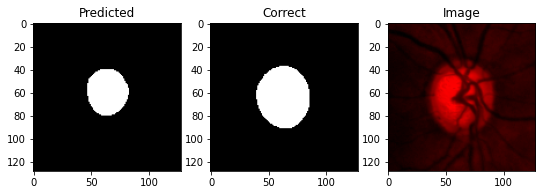

IOU: 0.5862069129943848
Dice: 0.7391304347826086
image #1


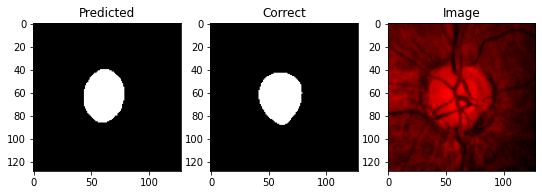

IOU: 0.9035153388977051
Dice: 0.9493123772102161
image #2


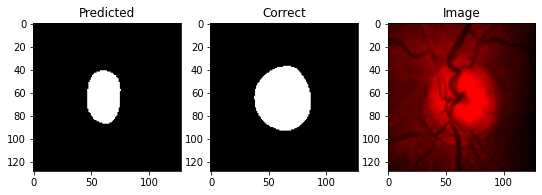

IOU: 0.5074836015701294
Dice: 0.6732857586099907
image #3


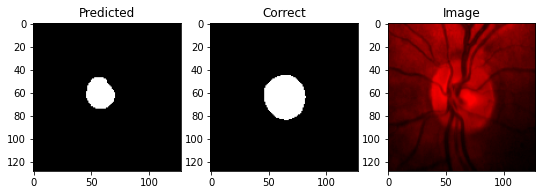

IOU: 0.4449458420276642
Dice: 0.6158650843222986
image #4


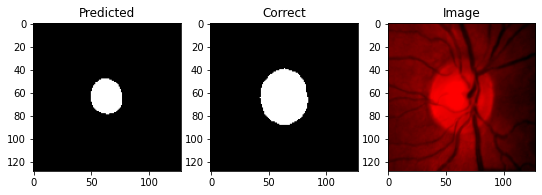

IOU: 0.42802056670188904
Dice: 0.5994599459945995
image #5


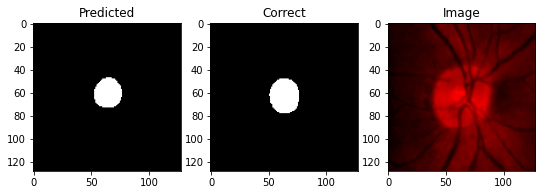

IOU: 0.7704402804374695
Dice: 0.8703374777975134
image #6


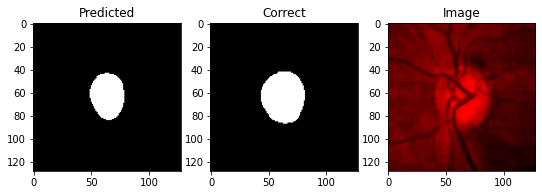

IOU: 0.7052238583564758
Dice: 0.8271334792122538
image #7


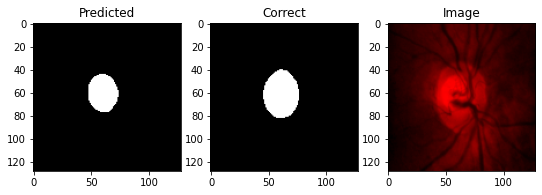

IOU: 0.676323652267456
Dice: 0.8069129916567342
image #8


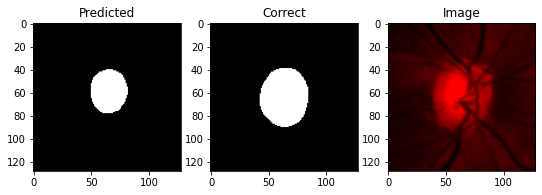

IOU: 0.5694117546081543
Dice: 0.7256371814092953
image #9


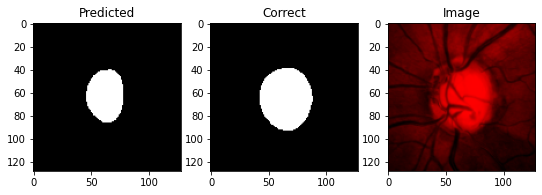

IOU: 0.6047471761703491
Dice: 0.7536977491961415
image #10


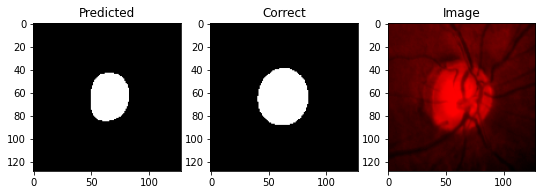

IOU: 0.6670553684234619
Dice: 0.8002798181182231
image #11


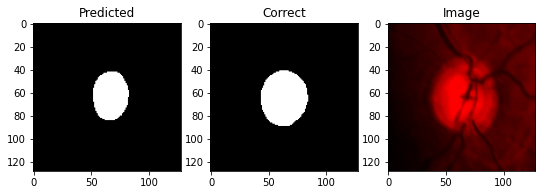

IOU: 0.6707632541656494
Dice: 0.8029423151374371
image #12


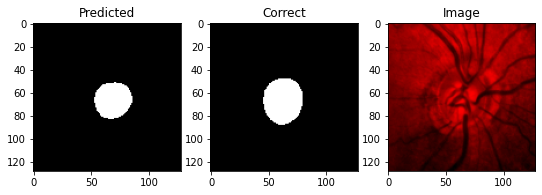

IOU: 0.5742738842964172
Dice: 0.7295730100158144
image #13


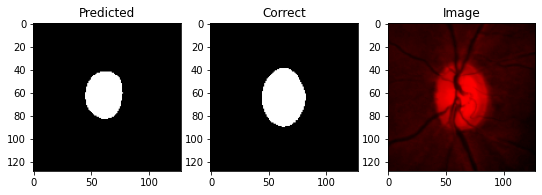

IOU: 0.720708429813385
Dice: 0.8376880443388757
image #14


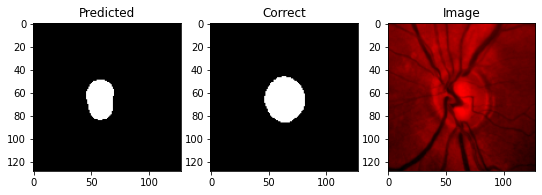

IOU: 0.5526785850524902
Dice: 0.7119033927544566
image #15


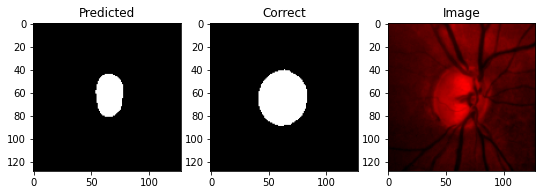

IOU: 0.44918444752693176
Dice: 0.6199134199134199
image #16


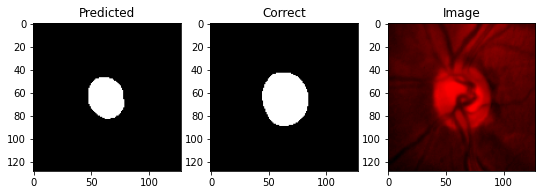

IOU: 0.6054421663284302
Dice: 0.7542372881355932
image #17


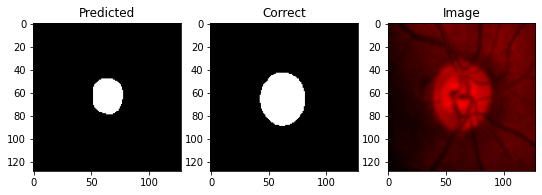

IOU: 0.47413182258605957
Dice: 0.6432692307692308
image #18


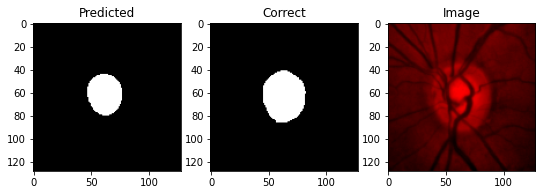

IOU: 0.6607280969619751
Dice: 0.7957089552238806
image #19


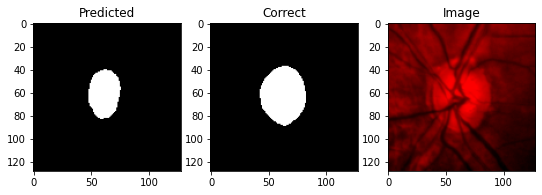

IOU: 0.5935483574867249
Dice: 0.7449392712550608
image #20


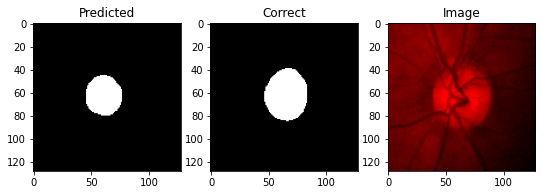

IOU: 0.6161242723464966
Dice: 0.7624713958810069
image #21


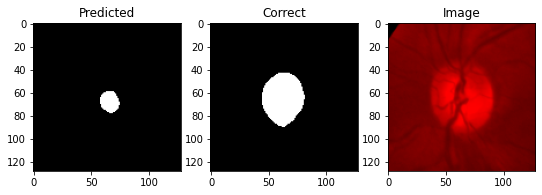

IOU: 0.1901792734861374
Dice: 0.3195808775376555
image #22


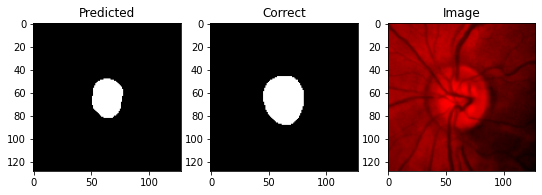

IOU: 0.6150591969490051
Dice: 0.7616553169198533
image #23


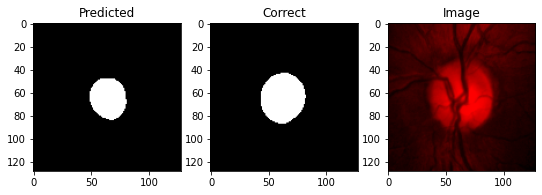

IOU: 0.6820940971374512
Dice: 0.8110058637798827
image #24


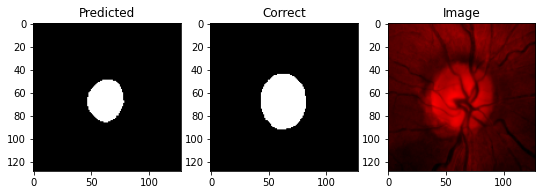

IOU: 0.595588207244873
Dice: 0.7465437788018433
image #25


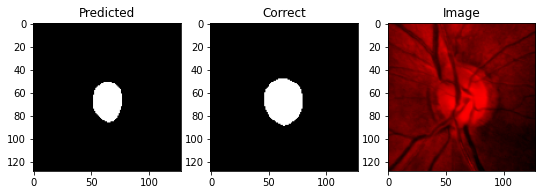

IOU: 0.656872034072876
Dice: 0.7929061784897025
image #26


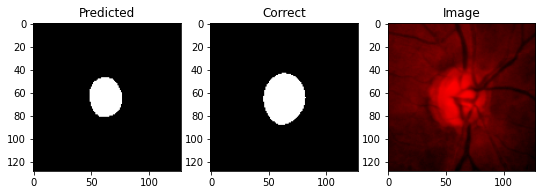

IOU: 0.6196615695953369
Dice: 0.7651741293532338
image #27


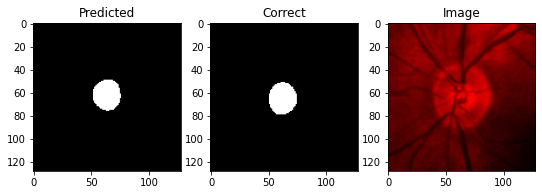

IOU: 0.7383333444595337
Dice: 0.8494726749760306
image #28


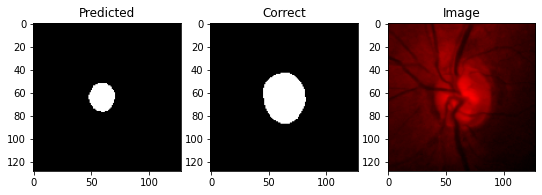

IOU: 0.3452380895614624
Dice: 0.5132743362831859
image #29


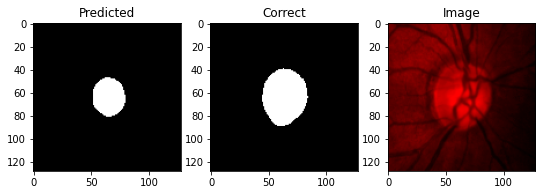

IOU: 0.5037137269973755
Dice: 0.6699595868881904
image #30


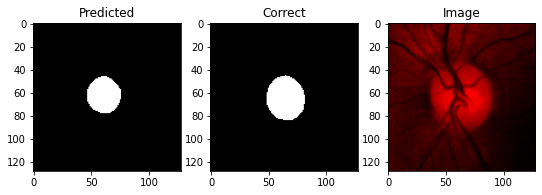

IOU: 0.6381766200065613
Dice: 0.7791304347826087
image #31


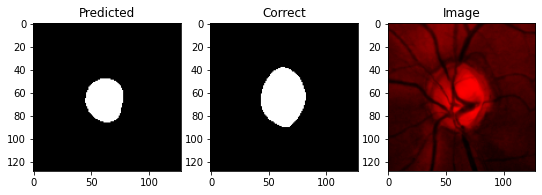

IOU: 0.654920220375061
Dice: 0.7914825231016472
image #32


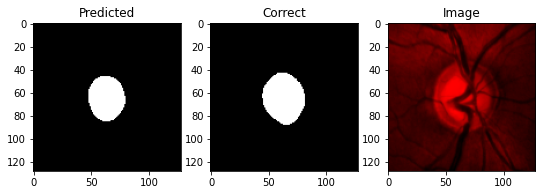

IOU: 0.7874899506568909
Dice: 0.8811126065500224
image #33


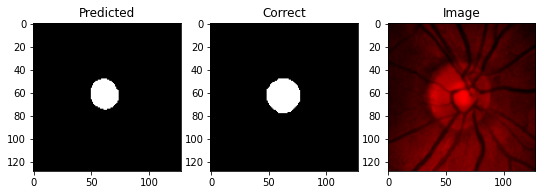

IOU: 0.7206946611404419
Dice: 0.8376787216148024
image #34


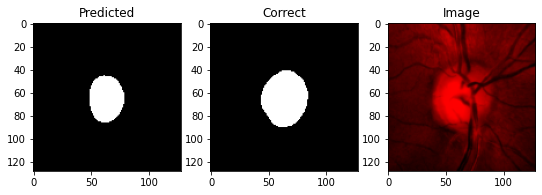

IOU: 0.6428571343421936
Dice: 0.782608695652174
image #35


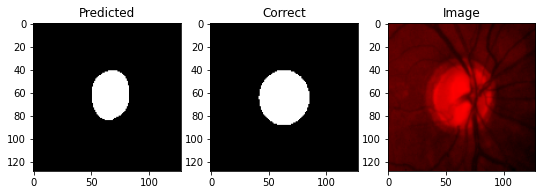

IOU: 0.6699088215827942
Dice: 0.8023298143429195
image #36


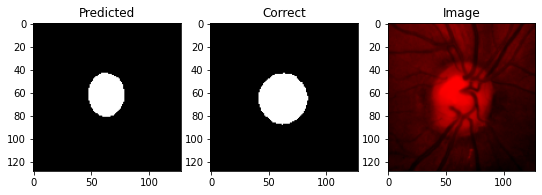

IOU: 0.6384879946708679
Dice: 0.7793624161073825
image #37


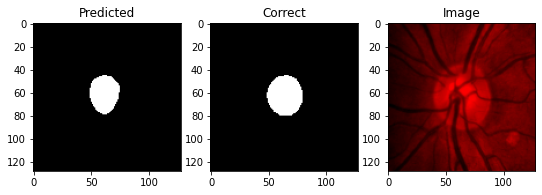

IOU: 0.7244898080825806
Dice: 0.8402366863905325
image #38


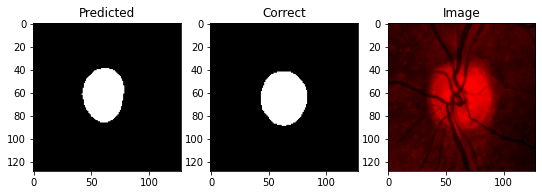

IOU: 0.7732742428779602
Dice: 0.8721428571428571
image #39


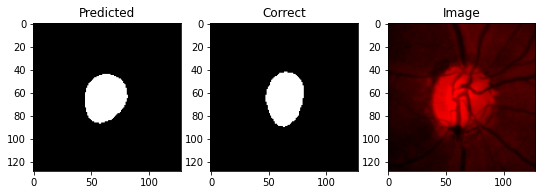

IOU: 0.7864077687263489
Dice: 0.8804347826086957
image #40


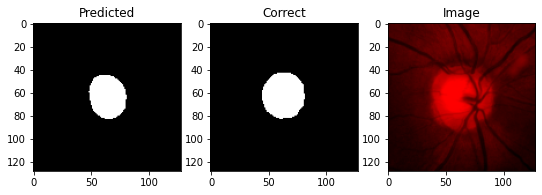

IOU: 0.8157227635383606
Dice: 0.8985102420856611
image #41


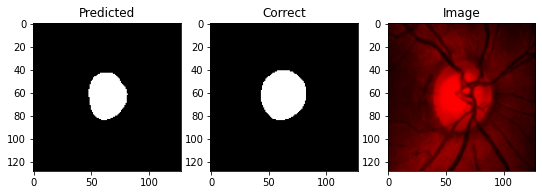

IOU: 0.7981927990913391
Dice: 0.8877721943048577
image #42


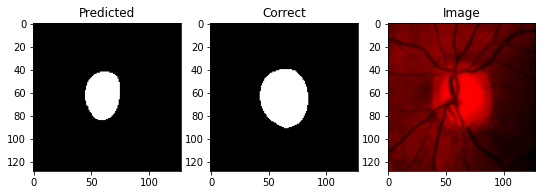

IOU: 0.6086434721946716
Dice: 0.7567164179104477
image #43


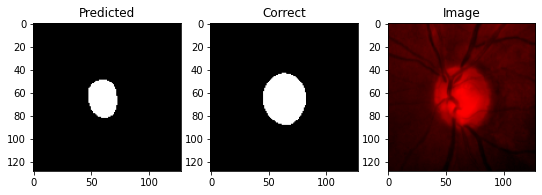

IOU: 0.5197215676307678
Dice: 0.683969465648855
image #44


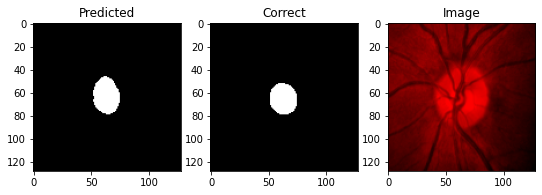

IOU: 0.8009950518608093
Dice: 0.8895027624309392
image #45


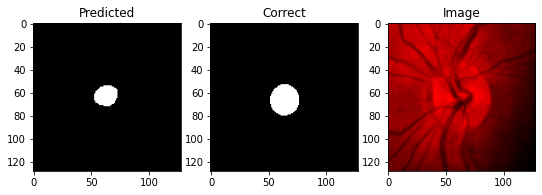

IOU: 0.5440900325775146
Dice: 0.7047387606318347
image #46


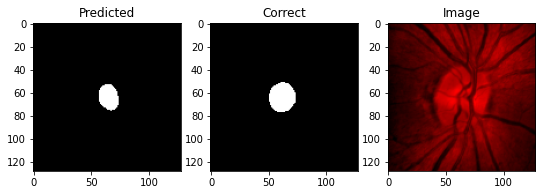

IOU: 0.6179540753364563
Dice: 0.7638709677419355
image #47


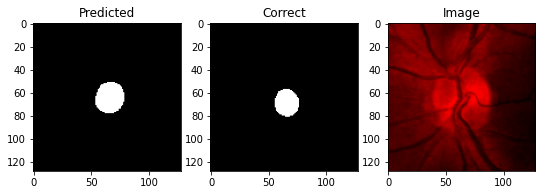

IOU: 0.5986394286155701
Dice: 0.7489361702127659
image #48


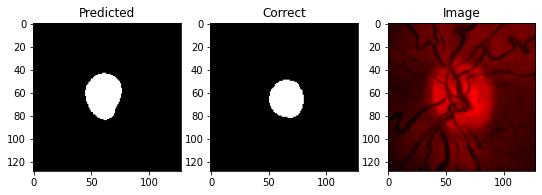

IOU: 0.5665158629417419
Dice: 0.7232813402657423
image #49


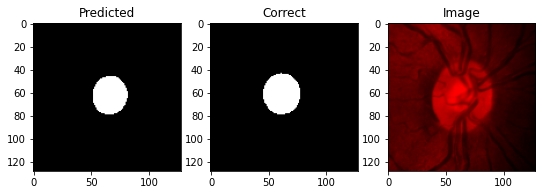

IOU: 0.6785714030265808
Dice: 0.8085106382978723
image #50


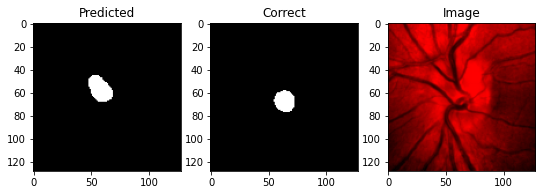

IOU: 0.20118343830108643
Dice: 0.33497536945812806


In [9]:
pred_iou, pred_dice, pred_cup = predict(l_channel_test, X_test, Y_test, model, img_size)

In [10]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.617934
0.7537367692558219


### Training and Test disc

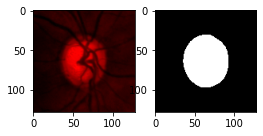

In [11]:
X_test, Z_test = next(data_generator(l_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [12]:
model_disc = create_compile_model(img_size)

history_disc = train(l_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_l', 
                     model_disc, epochs, X_test, Z_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 47s 452ms/step - loss: 1.0095 - mean_IOU_gpu: 0.1773 - dice_metric: 0.2984 - val_loss: 0.9984 - val_mean_IOU_gpu: 0.3991 - val_dice_metric: 0.5577
Epoch 2/500
99/99 [==============================] - 45s 455ms/step - loss: 1.0111 - mean_IOU_gpu: 0.2334 - dice_metric: 0.3764 - val_loss: 0.9849 - val_mean_IOU_gpu: 0.2458 - val_dice_metric: 0.3831
Epoch 3/500
99/99 [==============================] - 45s 460ms/step - loss: 1.0161 - mean_IOU_gpu: 0.2250 - dice_metric: 0.3645 - val_loss: 0.9672 - val_mean_IOU_gpu: 0.1964 - val_dice_metric: 0.3182
Epoch 4/500
99/99 [==============================] - 43s 438ms/step - loss: 0.9789 - mean_IOU_gpu: 0.2350 - dice_metric: 0.3762 - val_loss: 0.9422 - val_mean_IOU_gpu: 0.2279 - val_dice_metric: 0.3604
Epoch 5/500
99/99 [==============================] - 44s 450ms/step - loss: 0.9374 - mean_IOU_gpu: 0.2773 - dice_metric: 0.4272 - val_loss: 0.9071 - val_mean_IOU_gpu: 0.2917 - val_dice_metric: 0.4395


Epoch 42/500
99/99 [==============================] - 33s 335ms/step - loss: 0.1225 - mean_IOU_gpu: 0.7577 - dice_metric: 0.8584 - val_loss: 1.1690 - val_mean_IOU_gpu: 0.1429 - val_dice_metric: 0.2395
Epoch 43/500
99/99 [==============================] - 33s 339ms/step - loss: 0.1259 - mean_IOU_gpu: 0.7532 - dice_metric: 0.8548 - val_loss: 0.8736 - val_mean_IOU_gpu: 0.2157 - val_dice_metric: 0.3420
Epoch 44/500
99/99 [==============================] - 33s 333ms/step - loss: 0.1219 - mean_IOU_gpu: 0.7590 - dice_metric: 0.8590 - val_loss: 1.0305 - val_mean_IOU_gpu: 0.1681 - val_dice_metric: 0.2768
Epoch 45/500
99/99 [==============================] - 33s 330ms/step - loss: 0.1078 - mean_IOU_gpu: 0.7811 - dice_metric: 0.8743 - val_loss: 1.1205 - val_mean_IOU_gpu: 0.1447 - val_dice_metric: 0.2432
Epoch 46/500
99/99 [==============================] - 33s 333ms/step - loss: 0.1061 - mean_IOU_gpu: 0.7840 - dice_metric: 0.8758 - val_loss: 1.1461 - val_mean_IOU_gpu: 0.1395 - val_dice_metric: 0.

Epoch 83/500
99/99 [==============================] - 33s 337ms/step - loss: 0.0867 - mean_IOU_gpu: 0.8145 - dice_metric: 0.8955 - val_loss: 0.9995 - val_mean_IOU_gpu: 0.1750 - val_dice_metric: 0.2875
Epoch 84/500
99/99 [==============================] - 33s 336ms/step - loss: 0.0772 - mean_IOU_gpu: 0.8311 - dice_metric: 0.9064 - val_loss: 0.4397 - val_mean_IOU_gpu: 0.4279 - val_dice_metric: 0.5861
Epoch 85/500
99/99 [==============================] - 33s 338ms/step - loss: 0.0809 - mean_IOU_gpu: 0.8226 - dice_metric: 0.9013 - val_loss: 0.5488 - val_mean_IOU_gpu: 0.3600 - val_dice_metric: 0.5153
Epoch 86/500
99/99 [==============================] - 33s 333ms/step - loss: 0.0759 - mean_IOU_gpu: 0.8329 - dice_metric: 0.9073 - val_loss: 0.5021 - val_mean_IOU_gpu: 0.3855 - val_dice_metric: 0.5429
Epoch 87/500
99/99 [==============================] - 33s 335ms/step - loss: 0.0809 - mean_IOU_gpu: 0.8264 - dice_metric: 0.9026 - val_loss: 0.4258 - val_mean_IOU_gpu: 0.4337 - val_dice_metric: 0.

Epoch 124/500
99/99 [==============================] - 33s 328ms/step - loss: 0.0652 - mean_IOU_gpu: 0.8529 - dice_metric: 0.9196 - val_loss: 0.2060 - val_mean_IOU_gpu: 0.6476 - val_dice_metric: 0.7799
Epoch 125/500
99/99 [==============================] - 34s 347ms/step - loss: 0.0664 - mean_IOU_gpu: 0.8504 - dice_metric: 0.9182 - val_loss: 0.2541 - val_mean_IOU_gpu: 0.5958 - val_dice_metric: 0.7393
Epoch 126/500
99/99 [==============================] - 33s 335ms/step - loss: 0.0681 - mean_IOU_gpu: 0.8482 - dice_metric: 0.9165 - val_loss: 0.1536 - val_mean_IOU_gpu: 0.7119 - val_dice_metric: 0.8271
Epoch 127/500
99/99 [==============================] - 33s 335ms/step - loss: 0.0653 - mean_IOU_gpu: 0.8514 - dice_metric: 0.9188 - val_loss: 0.1824 - val_mean_IOU_gpu: 0.6745 - val_dice_metric: 0.8002
Epoch 128/500
99/99 [==============================] - 34s 346ms/step - loss: 0.0631 - mean_IOU_gpu: 0.8562 - dice_metric: 0.9217 - val_loss: 0.1989 - val_mean_IOU_gpu: 0.6545 - val_dice_metri

99/99 [==============================] - 33s 333ms/step - loss: 0.0571 - mean_IOU_gpu: 0.8688 - dice_metric: 0.9289 - val_loss: 0.1387 - val_mean_IOU_gpu: 0.7367 - val_dice_metric: 0.8442
Epoch 165/500
99/99 [==============================] - 33s 336ms/step - loss: 0.0600 - mean_IOU_gpu: 0.8617 - dice_metric: 0.9249 - val_loss: 0.1308 - val_mean_IOU_gpu: 0.7472 - val_dice_metric: 0.8515
Epoch 166/500
99/99 [==============================] - 33s 333ms/step - loss: 0.0657 - mean_IOU_gpu: 0.8514 - dice_metric: 0.9186 - val_loss: 0.2372 - val_mean_IOU_gpu: 0.6173 - val_dice_metric: 0.7563
Epoch 167/500
99/99 [==============================] - 33s 335ms/step - loss: 0.0615 - mean_IOU_gpu: 0.8596 - dice_metric: 0.9236 - val_loss: 0.2695 - val_mean_IOU_gpu: 0.5823 - val_dice_metric: 0.7286
Epoch 168/500
99/99 [==============================] - 33s 338ms/step - loss: 0.0620 - mean_IOU_gpu: 0.8601 - dice_metric: 0.9235 - val_loss: 0.1566 - val_mean_IOU_gpu: 0.7144 - val_dice_metric: 0.8288
Epoc

Epoch 205/500
99/99 [==============================] - 33s 336ms/step - loss: 0.0576 - mean_IOU_gpu: 0.8676 - dice_metric: 0.9283 - val_loss: 0.0938 - val_mean_IOU_gpu: 0.8068 - val_dice_metric: 0.8905
Epoch 206/500
99/99 [==============================] - 33s 336ms/step - loss: 0.0592 - mean_IOU_gpu: 0.8650 - dice_metric: 0.9267 - val_loss: 0.1911 - val_mean_IOU_gpu: 0.6745 - val_dice_metric: 0.7988
Epoch 207/500
99/99 [==============================] - 34s 348ms/step - loss: 0.0593 - mean_IOU_gpu: 0.8632 - dice_metric: 0.9258 - val_loss: 0.1058 - val_mean_IOU_gpu: 0.7871 - val_dice_metric: 0.8777
Epoch 208/500
99/99 [==============================] - 33s 335ms/step - loss: 0.0586 - mean_IOU_gpu: 0.8658 - dice_metric: 0.9272 - val_loss: 0.1479 - val_mean_IOU_gpu: 0.7295 - val_dice_metric: 0.8387
Epoch 209/500
99/99 [==============================] - 33s 334ms/step - loss: 0.0627 - mean_IOU_gpu: 0.8569 - dice_metric: 0.9217 - val_loss: 0.2169 - val_mean_IOU_gpu: 0.6456 - val_dice_metri

99/99 [==============================] - 33s 330ms/step - loss: 0.0609 - mean_IOU_gpu: 0.8621 - dice_metric: 0.9247 - val_loss: 0.1169 - val_mean_IOU_gpu: 0.7726 - val_dice_metric: 0.8680
Epoch 246/500
99/99 [==============================] - 33s 334ms/step - loss: 0.0523 - mean_IOU_gpu: 0.8774 - dice_metric: 0.9340 - val_loss: 0.0815 - val_mean_IOU_gpu: 0.8279 - val_dice_metric: 0.9036
Epoch 247/500
99/99 [==============================] - 34s 339ms/step - loss: 0.0551 - mean_IOU_gpu: 0.8726 - dice_metric: 0.9311 - val_loss: 0.1295 - val_mean_IOU_gpu: 0.7552 - val_dice_metric: 0.8562
Epoch 248/500
99/99 [==============================] - 33s 329ms/step - loss: 0.0600 - mean_IOU_gpu: 0.8626 - dice_metric: 0.9254 - val_loss: 0.1311 - val_mean_IOU_gpu: 0.7528 - val_dice_metric: 0.8547
Epoch 249/500
99/99 [==============================] - 33s 335ms/step - loss: 0.0567 - mean_IOU_gpu: 0.8686 - dice_metric: 0.9288 - val_loss: 0.1677 - val_mean_IOU_gpu: 0.7057 - val_dice_metric: 0.8208
Epoc

Epoch 286/500
99/99 [==============================] - 33s 335ms/step - loss: 0.0563 - mean_IOU_gpu: 0.8694 - dice_metric: 0.9293 - val_loss: 0.0857 - val_mean_IOU_gpu: 0.8232 - val_dice_metric: 0.9005
Epoch 287/500
99/99 [==============================] - 33s 330ms/step - loss: 0.0565 - mean_IOU_gpu: 0.8679 - dice_metric: 0.9286 - val_loss: 0.0643 - val_mean_IOU_gpu: 0.8600 - val_dice_metric: 0.9229
Epoch 288/500
99/99 [==============================] - 34s 340ms/step - loss: 0.0489 - mean_IOU_gpu: 0.8848 - dice_metric: 0.9381 - val_loss: 0.1348 - val_mean_IOU_gpu: 0.7507 - val_dice_metric: 0.8520
Epoch 289/500
99/99 [==============================] - 32s 325ms/step - loss: 0.0482 - mean_IOU_gpu: 0.8850 - dice_metric: 0.9385 - val_loss: 0.1152 - val_mean_IOU_gpu: 0.7778 - val_dice_metric: 0.8706
Epoch 290/500
99/99 [==============================] - 33s 336ms/step - loss: 0.0480 - mean_IOU_gpu: 0.8856 - dice_metric: 0.9387 - val_loss: 0.0995 - val_mean_IOU_gpu: 0.8013 - val_dice_metri

99/99 [==============================] - 33s 330ms/step - loss: 0.0489 - mean_IOU_gpu: 0.8843 - dice_metric: 0.9380 - val_loss: 0.0923 - val_mean_IOU_gpu: 0.8140 - val_dice_metric: 0.8938
Epoch 327/500
99/99 [==============================] - 33s 334ms/step - loss: 0.0471 - mean_IOU_gpu: 0.8879 - dice_metric: 0.9400 - val_loss: 0.0762 - val_mean_IOU_gpu: 0.8398 - val_dice_metric: 0.9103
Epoch 328/500
99/99 [==============================] - 34s 347ms/step - loss: 0.0510 - mean_IOU_gpu: 0.8797 - dice_metric: 0.9352 - val_loss: 0.1159 - val_mean_IOU_gpu: 0.7792 - val_dice_metric: 0.8701
Epoch 329/500
99/99 [==============================] - 35s 349ms/step - loss: 0.0531 - mean_IOU_gpu: 0.8760 - dice_metric: 0.9331 - val_loss: 0.1013 - val_mean_IOU_gpu: 0.8018 - val_dice_metric: 0.8858
Epoch 330/500
99/99 [==============================] - 34s 341ms/step - loss: 0.0575 - mean_IOU_gpu: 0.8697 - dice_metric: 0.9291 - val_loss: 0.1934 - val_mean_IOU_gpu: 0.6789 - val_dice_metric: 0.7975
Epoc

Epoch 367/500
99/99 [==============================] - 33s 337ms/step - loss: 0.0473 - mean_IOU_gpu: 0.8873 - dice_metric: 0.9397 - val_loss: 0.1171 - val_mean_IOU_gpu: 0.7771 - val_dice_metric: 0.8689
Epoch 368/500
99/99 [==============================] - 33s 339ms/step - loss: 0.0520 - mean_IOU_gpu: 0.8795 - dice_metric: 0.9350 - val_loss: 0.0620 - val_mean_IOU_gpu: 0.8635 - val_dice_metric: 0.9247
Epoch 369/500
99/99 [==============================] - 33s 336ms/step - loss: 0.0467 - mean_IOU_gpu: 0.8887 - dice_metric: 0.9406 - val_loss: 0.0785 - val_mean_IOU_gpu: 0.8357 - val_dice_metric: 0.9079
Epoch 370/500
99/99 [==============================] - 33s 336ms/step - loss: 0.0480 - mean_IOU_gpu: 0.8856 - dice_metric: 0.9388 - val_loss: 0.0695 - val_mean_IOU_gpu: 0.8509 - val_dice_metric: 0.9172
Epoch 371/500
99/99 [==============================] - 33s 333ms/step - loss: 0.0495 - mean_IOU_gpu: 0.8841 - dice_metric: 0.9376 - val_loss: 0.0666 - val_mean_IOU_gpu: 0.8553 - val_dice_metri

99/99 [==============================] - 34s 343ms/step - loss: 0.0457 - mean_IOU_gpu: 0.8896 - dice_metric: 0.9412 - val_loss: 0.0592 - val_mean_IOU_gpu: 0.8697 - val_dice_metric: 0.9283
Epoch 408/500
99/99 [==============================] - 33s 331ms/step - loss: 0.0401 - mean_IOU_gpu: 0.9015 - dice_metric: 0.9479 - val_loss: 0.0596 - val_mean_IOU_gpu: 0.8687 - val_dice_metric: 0.9277
Epoch 409/500
99/99 [==============================] - 33s 337ms/step - loss: 0.0467 - mean_IOU_gpu: 0.8879 - dice_metric: 0.9401 - val_loss: 0.0667 - val_mean_IOU_gpu: 0.8566 - val_dice_metric: 0.9206
Epoch 410/500
99/99 [==============================] - 33s 329ms/step - loss: 0.0444 - mean_IOU_gpu: 0.8924 - dice_metric: 0.9426 - val_loss: 0.0820 - val_mean_IOU_gpu: 0.8306 - val_dice_metric: 0.9045
Epoch 411/500
99/99 [==============================] - 33s 337ms/step - loss: 0.0424 - mean_IOU_gpu: 0.8968 - dice_metric: 0.9453 - val_loss: 0.0585 - val_mean_IOU_gpu: 0.8716 - val_dice_metric: 0.9294
Epoc

Epoch 448/500
99/99 [==============================] - 33s 333ms/step - loss: 0.0416 - mean_IOU_gpu: 0.8990 - dice_metric: 0.9464 - val_loss: 0.0615 - val_mean_IOU_gpu: 0.8652 - val_dice_metric: 0.9256
Epoch 449/500
99/99 [==============================] - 33s 334ms/step - loss: 0.0521 - mean_IOU_gpu: 0.8779 - dice_metric: 0.9342 - val_loss: 0.0565 - val_mean_IOU_gpu: 0.8750 - val_dice_metric: 0.9314
Epoch 450/500
99/99 [==============================] - 33s 335ms/step - loss: 0.0453 - mean_IOU_gpu: 0.8902 - dice_metric: 0.9415 - val_loss: 0.0673 - val_mean_IOU_gpu: 0.8553 - val_dice_metric: 0.9198
Epoch 451/500
99/99 [==============================] - 33s 329ms/step - loss: 0.0470 - mean_IOU_gpu: 0.8884 - dice_metric: 0.9401 - val_loss: 0.0559 - val_mean_IOU_gpu: 0.8762 - val_dice_metric: 0.9323
Epoch 452/500
99/99 [==============================] - 33s 332ms/step - loss: 0.0461 - mean_IOU_gpu: 0.8902 - dice_metric: 0.9412 - val_loss: 0.0602 - val_mean_IOU_gpu: 0.8678 - val_dice_metri

99/99 [==============================] - 33s 336ms/step - loss: 0.0439 - mean_IOU_gpu: 0.8945 - dice_metric: 0.9436 - val_loss: 0.0541 - val_mean_IOU_gpu: 0.8794 - val_dice_metric: 0.9339
Epoch 489/500
99/99 [==============================] - 30s 301ms/step - loss: 0.0463 - mean_IOU_gpu: 0.8880 - dice_metric: 0.9402 - val_loss: 0.0594 - val_mean_IOU_gpu: 0.8699 - val_dice_metric: 0.9284
Epoch 490/500
99/99 [==============================] - 25s 249ms/step - loss: 0.0457 - mean_IOU_gpu: 0.8892 - dice_metric: 0.9409 - val_loss: 0.0576 - val_mean_IOU_gpu: 0.8732 - val_dice_metric: 0.9302
Epoch 491/500
99/99 [==============================] - 23s 234ms/step - loss: 0.0472 - mean_IOU_gpu: 0.8871 - dice_metric: 0.9395 - val_loss: 0.0571 - val_mean_IOU_gpu: 0.8741 - val_dice_metric: 0.9310
Epoch 492/500
99/99 [==============================] - 23s 232ms/step - loss: 0.0428 - mean_IOU_gpu: 0.8953 - dice_metric: 0.9443 - val_loss: 0.0603 - val_mean_IOU_gpu: 0.8687 - val_dice_metric: 0.9276
Epoc

image #0


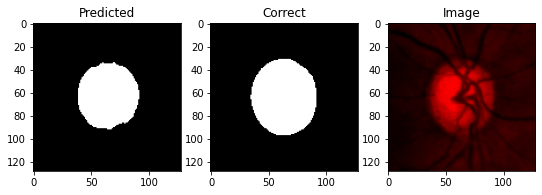

IOU: 0.8080297112464905
Dice: 0.89382347452883
image #1


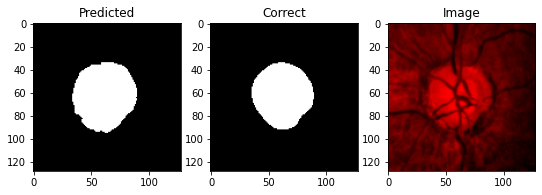

IOU: 0.8923611044883728
Dice: 0.9431192660550459
image #2


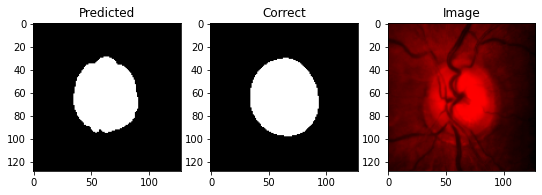

IOU: 0.8817204236984253
Dice: 0.9371428571428572
image #3


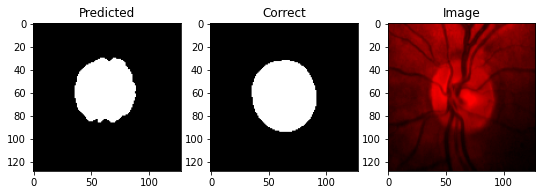

IOU: 0.80184006690979
Dice: 0.8900235663786331
image #4


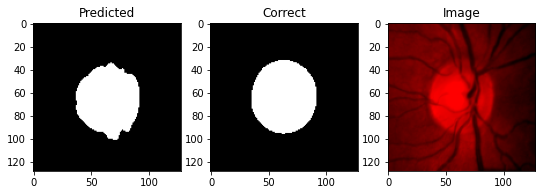

IOU: 0.868563711643219
Dice: 0.9296591733139956
image #5


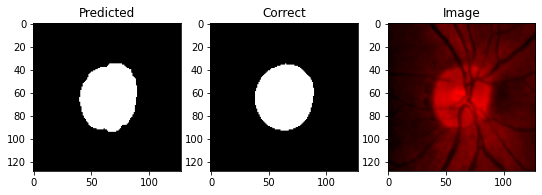

IOU: 0.9207879304885864
Dice: 0.9587606371372464
image #6


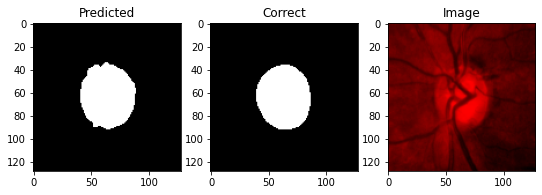

IOU: 0.92540043592453
Dice: 0.9612550511053007
image #7


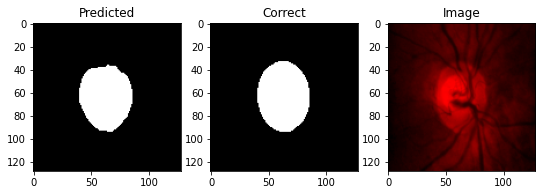

IOU: 0.9158371090888977
Dice: 0.9560699102503543
image #8


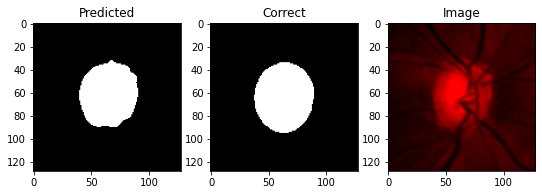

IOU: 0.8682658076286316
Dice: 0.9294885287307935
image #9


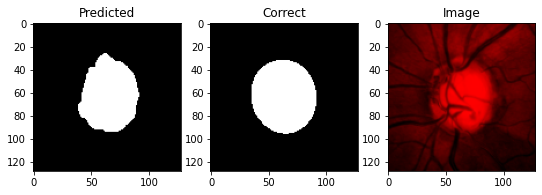

IOU: 0.852901041507721
Dice: 0.9206115306686314
image #10


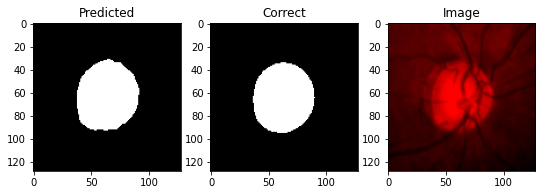

IOU: 0.9268110394477844
Dice: 0.962015503875969
image #11


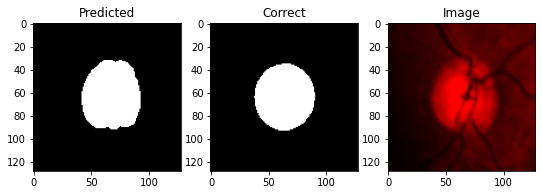

IOU: 0.8259730339050293
Dice: 0.9046935847509736
image #12


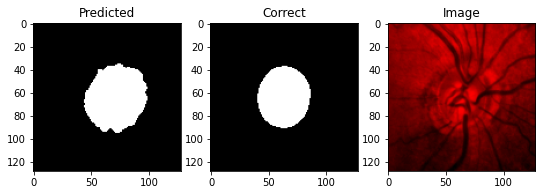

IOU: 0.6494688987731934
Dice: 0.7874885004599816
image #13


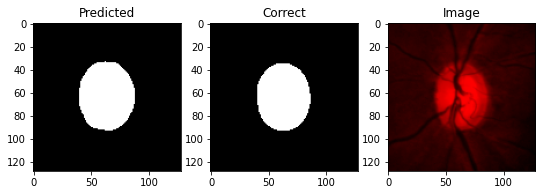

IOU: 0.9348958134651184
Dice: 0.9663526244952894
image #14


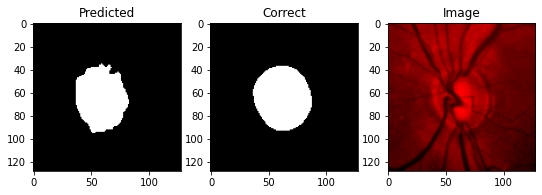

IOU: 0.7984628677368164
Dice: 0.8879392212725546
image #15


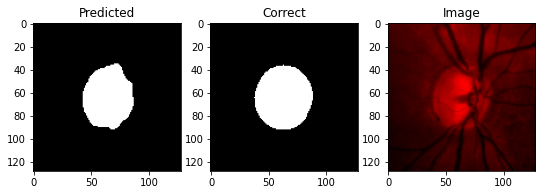

IOU: 0.8426762819290161
Dice: 0.914622178606477
image #16


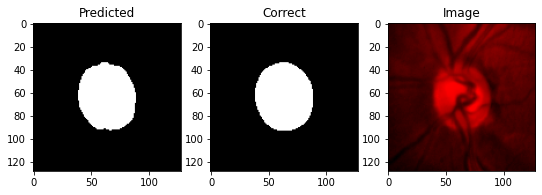

IOU: 0.9660519957542419
Dice: 0.9827328927733958
image #17


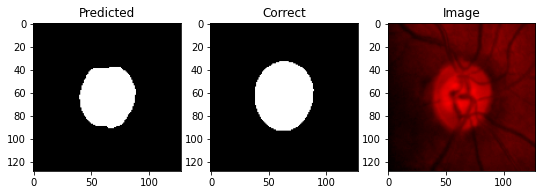

IOU: 0.8481065630912781
Dice: 0.9178113037604143
image #18


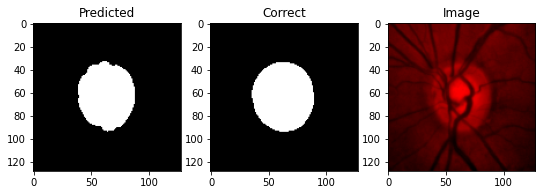

IOU: 0.8853228688240051
Dice: 0.9391737596014117
image #19


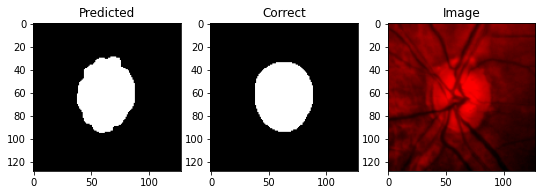

IOU: 0.8964313268661499
Dice: 0.945387604827163
image #20


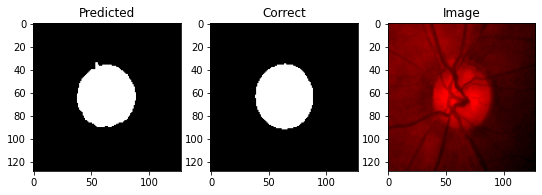

IOU: 0.9255319237709045
Dice: 0.9613259668508287
image #21


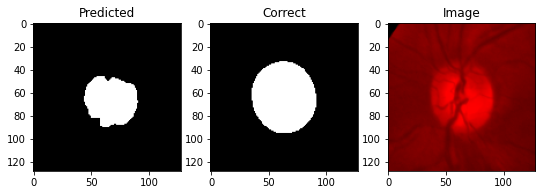

IOU: 0.5700182914733887
Dice: 0.7261294829995343
image #22


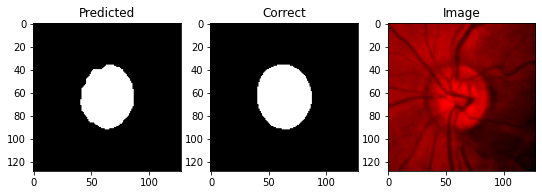

IOU: 0.925202488899231
Dice: 0.9611482306359812
image #23


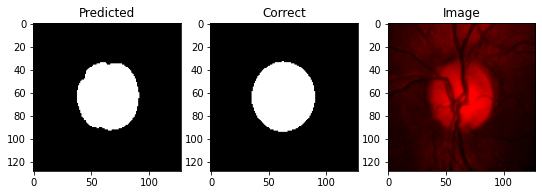

IOU: 0.9120179414749146
Dice: 0.9539847268455062
image #24


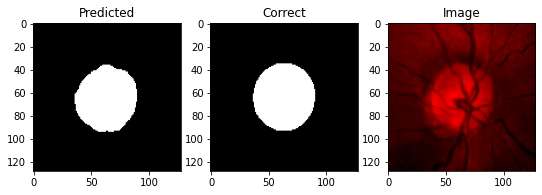

IOU: 0.9090552926063538
Dice: 0.9523613963039015
image #25


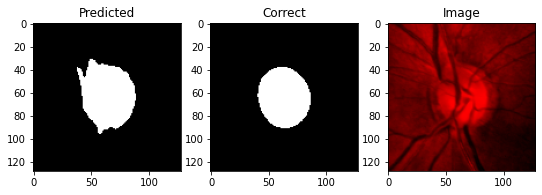

IOU: 0.8390442132949829
Dice: 0.9124785486638882
image #26


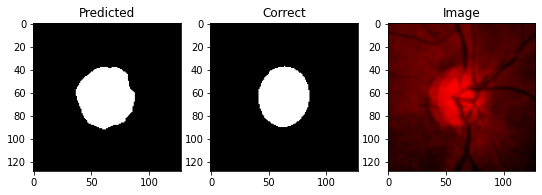

IOU: 0.8657653331756592
Dice: 0.9280538302277432
image #27


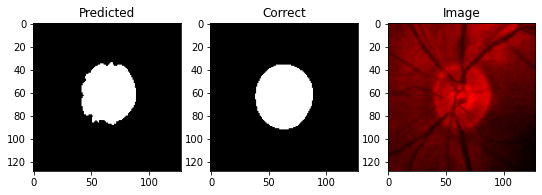

IOU: 0.8505798578262329
Dice: 0.9192576524463726
image #28


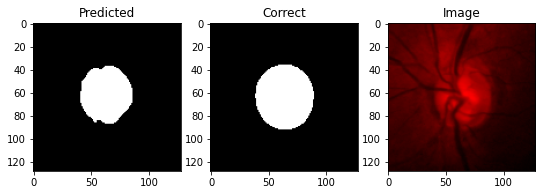

IOU: 0.777531087398529
Dice: 0.8748438670996752
image #29


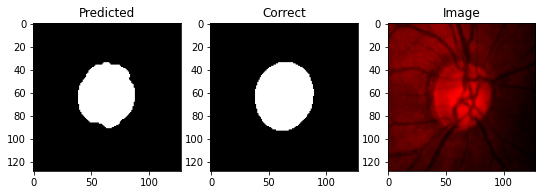

IOU: 0.8940927982330322
Dice: 0.9440855424370684
image #30


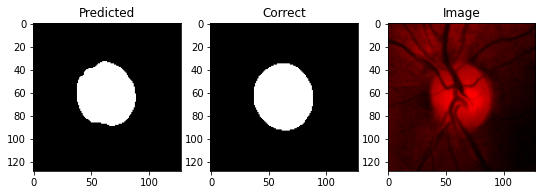

IOU: 0.910164475440979
Dice: 0.9529697504967984
image #31


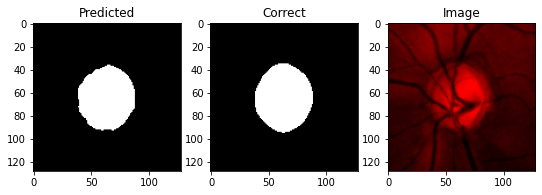

IOU: 0.9339457750320435
Dice: 0.9658448314860891
image #32


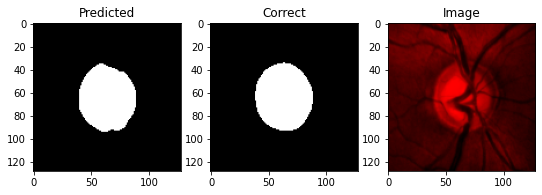

IOU: 0.9455869793891907
Dice: 0.9720325919401013
image #33


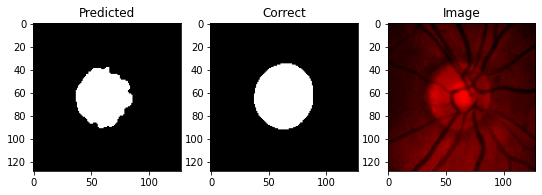

IOU: 0.7789792418479919
Dice: 0.87575978604425
image #34


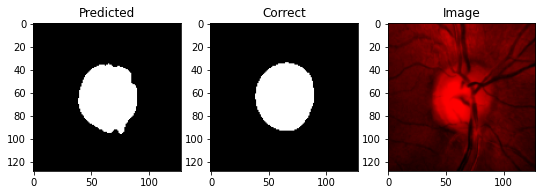

IOU: 0.9380677342414856
Dice: 0.9680443118875159
image #35


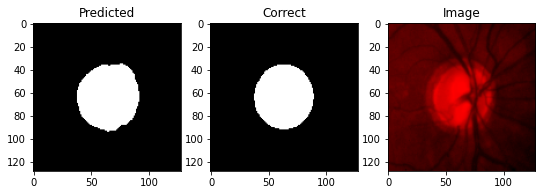

IOU: 0.9038771986961365
Dice: 0.9495120916419177
image #36


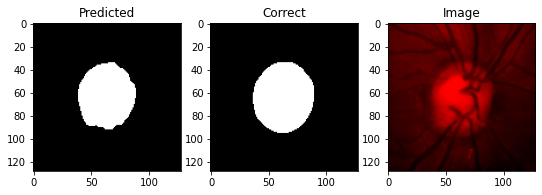

IOU: 0.8740682601928711
Dice: 0.9328030144442119
image #37


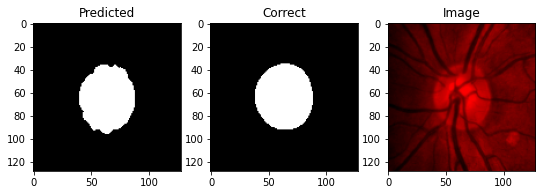

IOU: 0.9103330373764038
Dice: 0.9530621367903442
image #38


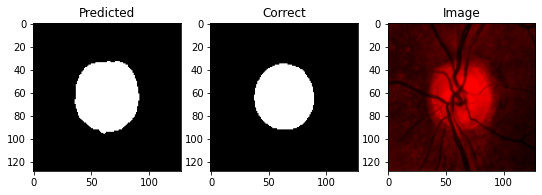

IOU: 0.8483859300613403
Dice: 0.9179748822605965
image #39


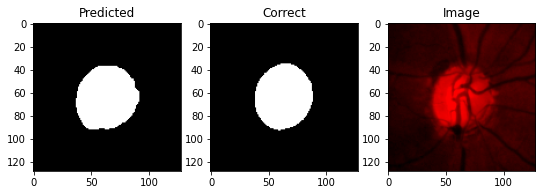

IOU: 0.9108623266220093
Dice: 0.9533521371230201
image #40


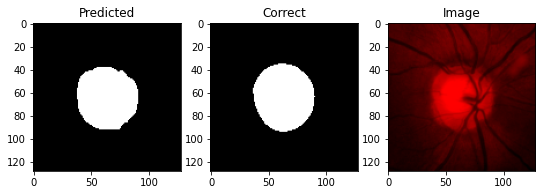

IOU: 0.9237631559371948
Dice: 0.9603709949409781
image #41


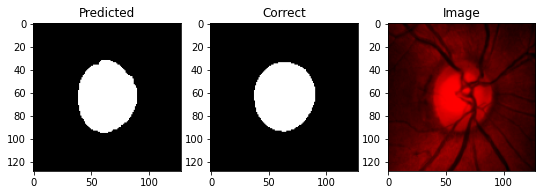

IOU: 0.9395604133605957
Dice: 0.9688385269121813
image #42


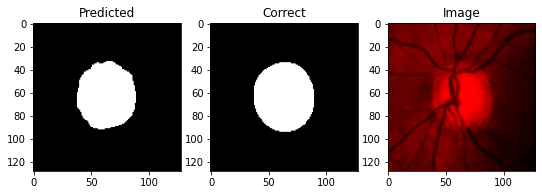

IOU: 0.9227129220962524
Dice: 0.9598031173092699
image #43


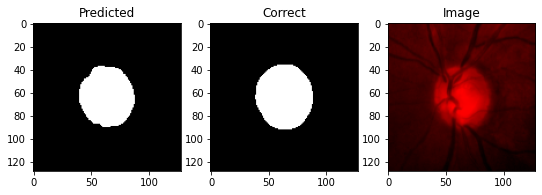

IOU: 0.8938294053077698
Dice: 0.9439386679444178
image #44


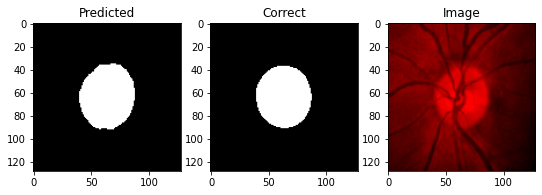

IOU: 0.9275830388069153
Dice: 0.9624312036372338
image #45


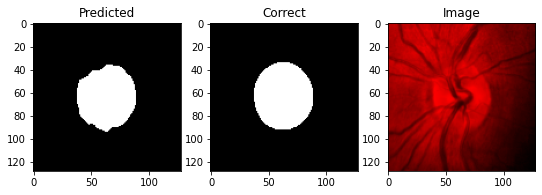

IOU: 0.9260960221290588
Dice: 0.9616301755907218
image #46


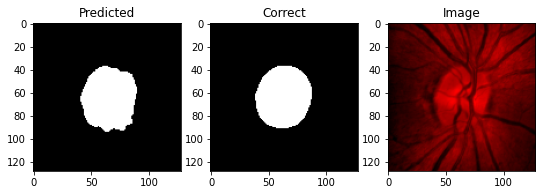

IOU: 0.8601583242416382
Dice: 0.924822695035461
image #47


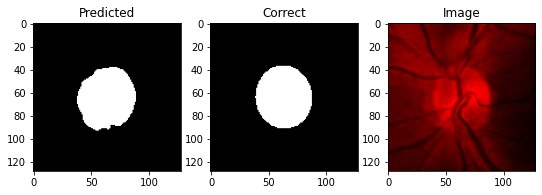

IOU: 0.9022082090377808
Dice: 0.9485903814262023
image #48


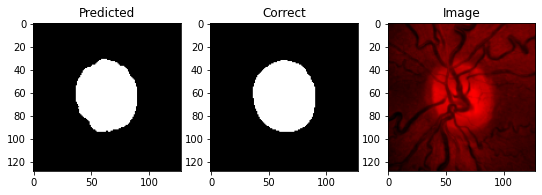

IOU: 0.9405245780944824
Dice: 0.9693508471349704
image #49


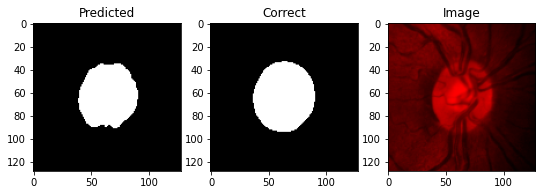

IOU: 0.8808411359786987
Dice: 0.9366459627329192
image #50


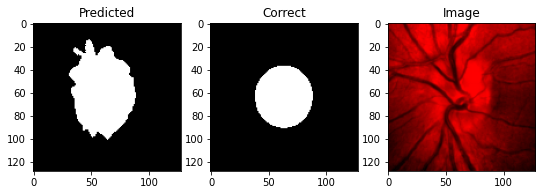

IOU: 0.6272808909416199
Dice: 0.7709558823529412


In [13]:
pred_iou, pred_dice, pred_disc = predict(l_channel_test, X_test, Z_test, model_disc, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.87210935
0.9296191059485874


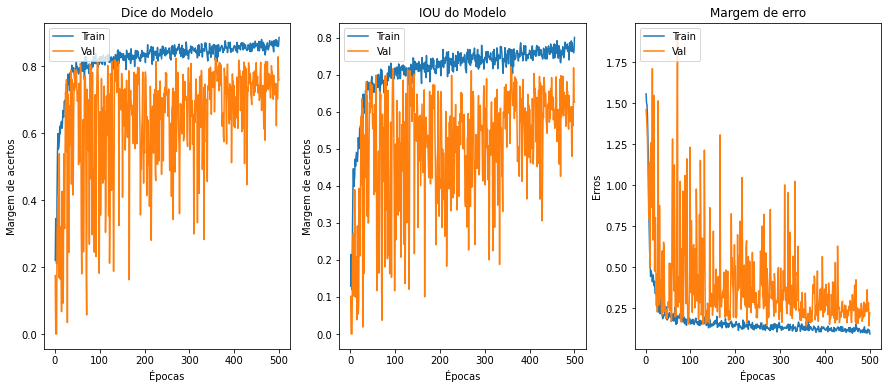

In [15]:
plot_results(history_cup, epochs)

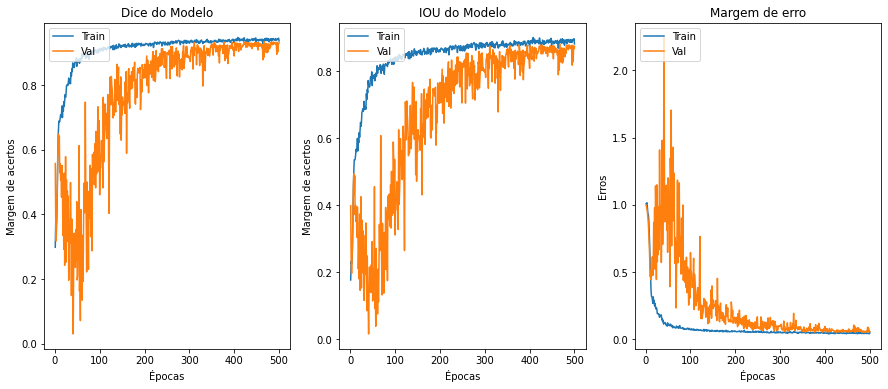

In [16]:
plot_results(history_disc, epochs)

In [17]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)

image #0 - cdr = 0.7101276289518339
image #1 - cdr = 0.7557915257208648
image #2 - cdr = 0.73484180210662
image #3 - cdr = 0.49016591462724396
image #4 - cdr = 0.4994963237975661
image #5 - cdr = 0.4441851562310338
image #6 - cdr = 0.7195416831546848
image #7 - cdr = 0.5787467545816146
image #8 - cdr = 0.6623807510512378
image #9 - cdr = 0.7011016966231642
image #10 - cdr = 0.6942292036537139
image #11 - cdr = 0.6951822596495237
image #12 - cdr = 0.5558898133120104
image #13 - cdr = 0.693538727443605
image #14 - cdr = 0.6281520774539474
image #15 - cdr = 0.6907246897082463
image #16 - cdr = 0.6213151878096896
image #17 - cdr = 0.5877363016438091
image #18 - cdr = 0.6174808898197561
image #19 - cdr = 0.6690860508900905
image #20 - cdr = 0.6452094308657393
image #21 - cdr = 0.40519639085609604
image #22 - cdr = 0.6306372524543744
image #23 - cdr = 0.6187839292447803
image #24 - cdr = 0.6400482203114887
image #25 - cdr = 0.5585669569191671
image #26 - cdr = 0.650103424329466
image #27 - c

In [18]:
pd.DataFrame(data= result)

cdr      area
0   0.710128  0.475574
1   0.755792  0.488390
2   0.734842  0.387085
3   0.490166  0.220469
4   0.499496  0.249065
5   0.444185  0.218641
6   0.719542  0.445755
7   0.578747  0.329922
8   0.662381  0.422892
9   0.701102  0.454264
10  0.694229  0.438987
11  0.695182  0.416600
12  0.555890  0.333745
13  0.693539  0.460400
14  0.628152  0.334330
15  0.690725  0.379237
16  0.621315  0.382631
17  0.587736  0.328263
18  0.617481  0.375937
19  0.669086  0.375204
20  0.645209  0.406732
21  0.405196  0.156511
22  0.630637  0.371867
23  0.618784  0.357455
24  0.640048  0.372959
25  0.558567  0.315143
26  0.650103  0.373845
27  0.515660  0.261270
28  0.502775  0.248429
29  0.605510  0.351721
30  0.576090  0.330902
31  0.692419  0.458993
32  0.682153  0.438197
33  0.535302  0.276409
34  0.686756  0.415740
35  0.741572  0.454619
36  0.659650  0.418761
37  0.570752  0.303953
38  0.752657  0.478419
39  0.747312  0.508632
40  0.702689  0.421666
41  0.666621  0.430369
42  0.735485  0.429297
43  0.638255  0.341117
44  0.563781  0.269069
45  0.369543  0.129464
46  0.408563  0.143058
47  0.501595  0.255529
48  0.645061  0.369540
49  0.587667  0.349801
50  0.325929  0.103728

In [19]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})

cup - dm   cup - dM  disc - dm  disc - dM
0   35.981098  40.744957  53.506062  57.376949
1   35.162399  46.081112  54.716919  60.970665
2   29.440372  47.323662  55.947086  64.399796
3   24.087143  27.849627  53.179493  56.816734
4   27.419289  31.113613  55.645264  62.289974
5   24.305622  26.592470  49.165211  59.867985
6   29.691422  40.848667  47.978642  56.770397
7   26.189323  33.207123  46.068710  57.377640
8   32.317692  38.386501  50.561226  57.952320
9   32.468731  46.447479  50.639450  66.249275
10  33.968060  43.274769  53.705822  62.334988
11  31.055435  43.074776  52.059555  61.961845
12  31.165121  33.404297  51.955753  60.091579
13  32.432236  41.904503  48.684593  60.421288
14  23.876505  36.220310  45.043514  57.661690
15  23.913477  38.402031  43.819180  55.596725
16  30.910650  37.034515  49.934750  59.606647
17  27.001316  31.868025  48.282753  54.221638
18  30.199230  36.276371  49.463173  58.748978
19  27.509220  43.009785  49.035263  64.281395
20  31.771385  35.132454  50.548420  54.451241
21  16.412973  19.399773  42.261631  47.877457
22  27.047430  34.689976  45.725067  55.007812
23  31.459480  36.858433  54.064190  59.565918
24  31.080389  37.064133  52.997688  57.908344
25  25.493147  35.133381  47.509048  62.899139
26  28.343578  34.736279  49.575447  53.431927
27  24.255232  27.145811  47.445465  52.642887
28  22.281502  25.040741  45.387184  49.805050
29  28.454952  33.758945  49.048817  55.752945
30  29.342224  31.793274  50.960140  55.188049
31  32.814831  38.571415  49.369427  55.705296
32  31.929874  39.503681  49.637146  57.910255
33  24.179056  26.820965  47.471153  50.104347
34  30.456236  40.992374  50.653183  59.689869
35  32.800575  43.597466  53.627003  58.790573
36  31.416927  38.014790  49.644676  57.628712
37  25.787477  33.629330  47.976742  58.921108
38  35.834557  47.297962  56.206703  62.841305
39  35.831905  43.500389  52.518570  58.209126
40  31.943426  39.228401  53.247818  55.826084
41  33.260021  41.294838  51.081203  61.946529
42  30.269310  43.063396  51.542221  58.551041
43  25.444517  33.924835  47.513313  53.152489
44  22.654064  32.527763  47.499603  57.695763
45  17.947964  20.758108  51.424469  56.172440
46  17.024113  23.352379  48.340797  57.157360
47  24.898617  27.870604  49.126812  55.563919
48  30.866388  40.190857  53.247078  62.305466
49  30.175030  33.696442  50.835995  57.339386
50  17.096842  26.437273  54.653175  81.113655